# Portugal Bank Marketing Campaign

*The dataset for this project originates from the [UCI Portugal bank marketing campaigns Repository](https://archive.ics.uci.edu/ml/datasets/bank+marketing).* 
<br>

*Notebook published on Anaconda. [click here](https://anaconda.org/arun2728/portugalbankmarketingcampaigns/notebook)*

*Github Repo - [Portugal Bank Marketing Campaign](https://github.com/arun2728/data-science-portfolio/tree/main/Portugal%20Bank%20Marketing%20Campaign)*


### Context:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (‘yes’) or not (‘no’) subscribed.

The dataset consists of several predictor variables and one target variable, y. Predictor variables includes the age, job, marital status, and so on.


### Problem Statement:

The objective of the dataset is to predict whether or not a client will subscribe to the term deposit.

### Attribute Information


#### Input variables:

1) **age:** Age of the customer (numeric)


2) **job:** type of job(categorical:"admin.","bluecollar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")


3) **marital:** marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)


4) **education:** education of individual (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")


5) **default:** has credit in default? (categorical: "no","yes","unknown")


6) **housing:** has housing loan? (categorical: "no","yes","unknown")


7) **loan:** has personal loan? (categorical: "no","yes","unknown")


8) **contact:** contact communication type (categorical: "cellular","telephone")


9) **month:** last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")


10) **dayofweek:** last contact day of the week (categorical: "mon","tue","wed","thu","fri")


11) **duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


12) **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)


13) **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)


14) **previous:** number of contacts performed before this campaign and for this client (numeric)


15) **poutcome:** outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")


16) **emp.var.rate:** employment variation rate - quarterly indicator (numeric)


17) **cons.price.idx:** consumer price index - monthly indicator (numeric)


18) **cons.conf.idx:** consumer confidence index - monthly indicator (numeric)


19) **concave points_se:** standard error for number of concave portions of the contour


20) **euribor3m:** euribor 3 month rate - daily indicator (numeric)


21) **nr.employed:** number of employees - quarterly indicator (numeric)

#### Output variable (desired target):

22) **y:**  has the client subscribed a term deposit? (binary: "yes","no")


<a id ='toc'></a>
# Table of Contents

1. **[Environment Setup](#environment_setup)**
    - 1.1 - **[Install Package](#install_packages)**
    - 1.2 - **[Load Dependencies](#import_packages)**
2. **[Load dataset](#load_data)**
3. **[Data Types and Dimensions](#Data_Types)**
4. **[Data Preprocessing](#data_preprocessing)**   
    - 4.1 - [Data Cleaning](#data_cleaning)
    - 4.2 - [Exploratory Analysis](#exploratory_analysis)
        - 4.2.1 - [Numeric features](#numerical_features)
        - 4.2.2 - [Categorical features](#categorical_features)
        - 4.2.3 - [Analysis report](#report)
    - 4.3 - [Feature Selection](#Feature_Selection)
    - 4.4 - [Data Transformation](#data_transformation) 
        - 4.4.1 - [Handling Unbalanced Labels (SMOTE)](#SMOTE) 
        - 4.4.2 - [Normalization](#normalization)
        - 4.4.3 - [Split the dataset](#split_the_dataset)
5. **[Model Development](#model_development)**
    - 5.1 - [Logistic Regression](#Logistic_Regression)
    - 5.2 - [AdaBoost](#AdaBoost)
    - 5.3 - [Naive Bayes](#Naive_Bayes)
    - 5.4 - [KNN](#KNN)
6. **[Model Comparision](#model_cmp)**  

<a id ='environment_setup'></a>
## 1. Environment Setup

[goto toc](#toc)

<a id ='install_packages'></a>
### 1.1. Install Packages

Install required packages

[goto toc](#toc)

In [1]:
# Install pandas
! pip install pandas

# Install matplotlib
! pip install matplotlib

# Install seaborn
! pip install seaborn 

# Install sklearn
! pip install sklearn

# Install tqdm to visualize iterations
! pip install tqdm

<a id ='import_packages'></a>
### 1.2. Load Dependencies

Import required packages

[goto toc](#toc)

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
from tqdm import tqdm
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

import seaborn as sns

# Set default setting of seaborn
sns.set()

In [162]:
# Create output folder to save model and plots
import os

# Get current working directory
current_dir = os.getcwd()

# Folder to save model
model_dir = current_dir + "/model"
os.makedirs(model_dir, exist_ok=True)

<a id ='load_data'></a>
# 2. Load Dataset

Read data from *bank.csv* file using pandas method *read_csv()*. 

[...goto toc](#toc)

In [4]:
# read the data
raw_data = pd.read_csv(current_dir + '/data/bank.csv',delimiter=";")

# print the first five rows of the data
raw_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<a id ='Data_Types'></a>
## 3. Data Types and Dimensions

[goto toc](#toc)

In [5]:
print("Bank Marketing Data Set has \033[4m\033[1m{}\033[0m\033[0m data points with \033[4m\033[1m{}\033[0m\033[0m variables each.".format(*raw_data.shape))

Bank Marketing Data Set has 41188 data points with 21 variables each.


In [6]:
# check the data types of the features
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<a id='data_preprocessing'></a>
## 4. Data Preprocessing


*Data preprocessing is a data mining technique which is used to transform the raw data in a useful and efficient format.*


**Steps:**

1. Data Cleaning 
2. Exploratory Analysis
3. Feature Selection 
4. Data Transformation

[...goto toc](#toc)

<a id='data_cleaning'></a>
## 4.1. Data Cleaning
[...goto toc](#toc)

### Missing Data Treatment

If the missing values are not handled properly we may end up drawing an inaccurate inference about the data. Due to improper handling, the result obtained will differ from the ones where the missing values are present.

In [7]:
# get the count of missing values
missing_values = raw_data.isnull().sum()

# print the count of missing values
print(missing_values)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [8]:
raw_data.default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

Since in feature default **unknow** is acting as missing value, similar might be the case for other features. We need consider them.

In [9]:
from operator import add

# Function to get missing values
def get_missing(data):
    
    # Create the dataframe
    missing_values = pd.DataFrame()

    # Get list of all columns
    missing_values['Features'] = data.columns.values

    # get the count of missing values
    missing_values['Count'] = list(map(add, [sum(data[i] == "unknown") for i in data.columns], [sum(data[i] == "") for i in data.columns]))

    # Calculate percentage of missing values
    percentage = (missing_values['Count'] * 100) / data.shape[0]
    missing_values['Percentange'] = percentage.values

    
    # return the dataframe
    return missing_values[missing_values.Count > 0]

In [10]:
# Function to plot missing values
def plot_missing(missing_values):
    # Plot missing values

    # Get list of features
    columns = missing_values.Features.values.tolist()

    # Get index's
    ind = missing_values.index.to_list() 

    # Create subplots
    fig, ax = plt.subplots(2,1,figsize=(18, 28))

    # Plot missing values based on count
    rects = ax[0].barh(ind, missing_values.Count.values.tolist(), color='lightblue')
    ax[0].set_yticks(ind)
    ax[0].set_yticklabels(columns, rotation='horizontal')
    ax[0].set_xlabel("Count of missing values")
    ax[0].set_title("Variables with missing values")

    # Plot missing values based on percentage
    rects = ax[1].barh(ind, missing_values.Percentange.values.tolist(), color='pink')
    ax[1].set_yticks(ind)
    ax[1].set_yticklabels(columns, rotation='horizontal')
    ax[1].set_xlabel("Percentage of missing values")
    ax[1].set_title("Variables with missing values")

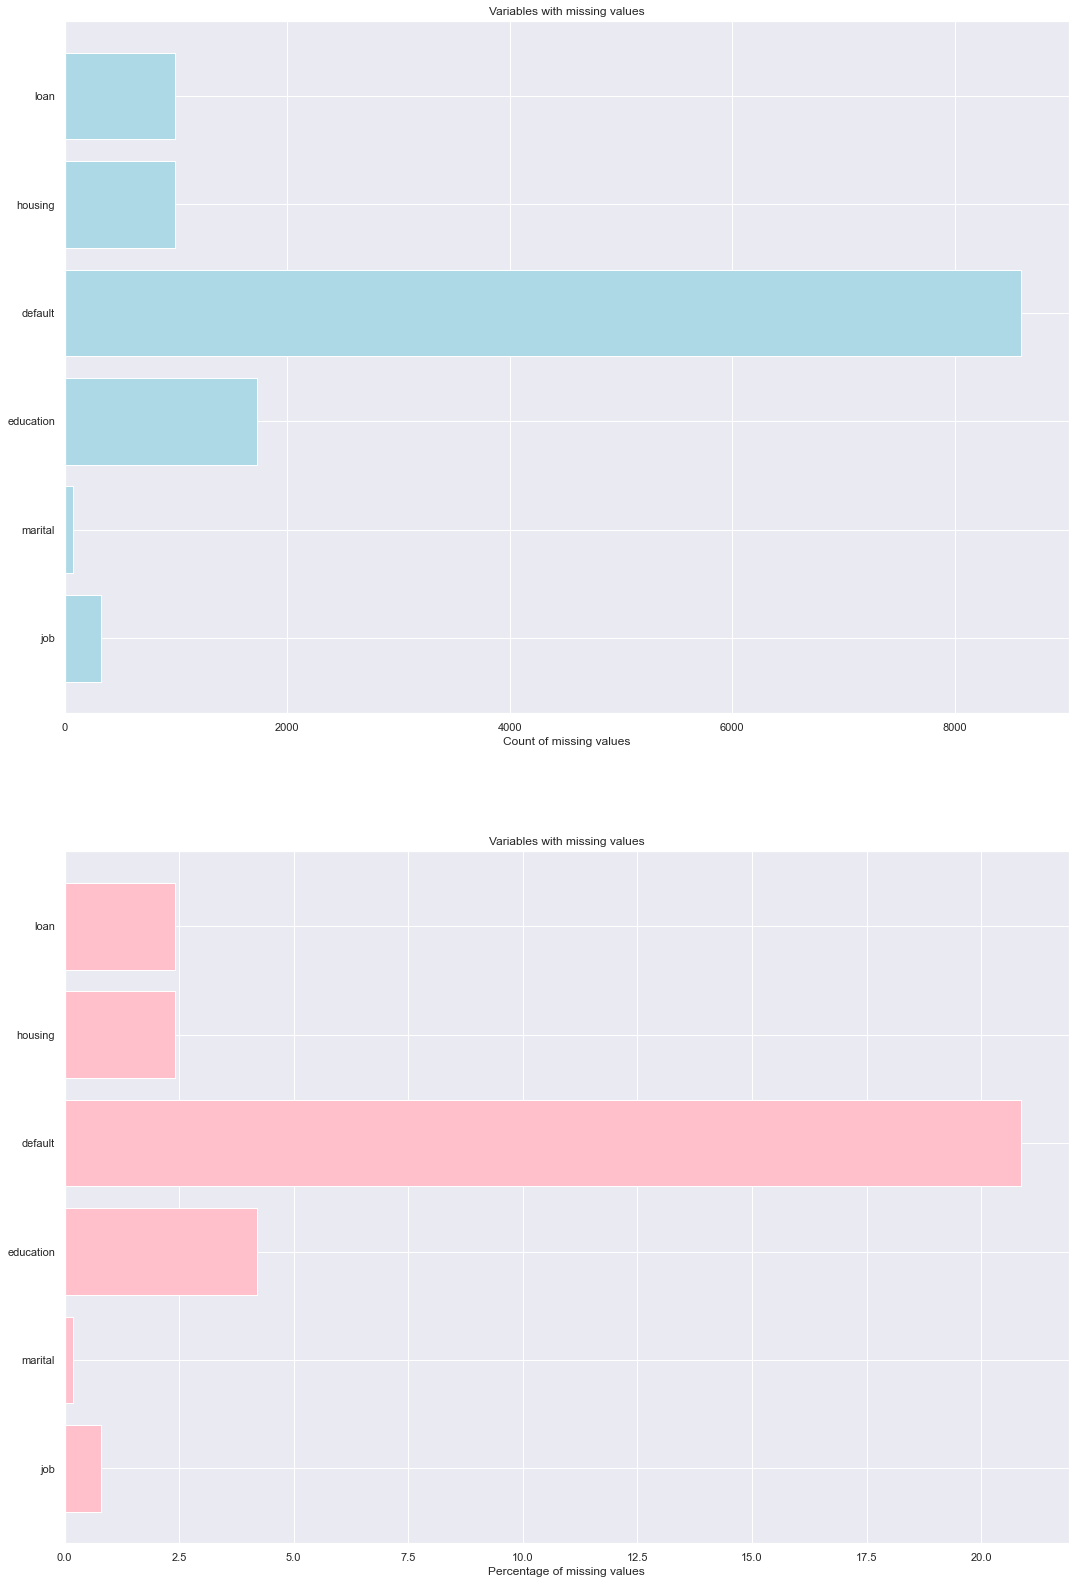

In [11]:
missing_values = get_missing(raw_data)
plot_missing(missing_values)

In [12]:
print(f"Total number of missing values - {missing_values.Count.sum()} i.e {round((missing_values.Count.sum() * 100) / raw_data.shape[0], 2)}%")

Total number of missing values - 12718 i.e 30.88%


**Note:**

Before deciding how to manage those missing values, we need to study each variable and take a decision after visualisations. We can’t afford to delete 12718 rows in our dataset, it’s more than 30% of our observations.

### Drop duplicates

An important part of Data analysis is analyzing Duplicate Values and removing them. Pandas drop_duplicates() method helps in removing duplicates from the data frame.

In [13]:
# Make the copy of the original dataset
data = raw_data.copy(deep = True) 

data.drop_duplicates(inplace = True)

In [14]:
# Get categorical features
categorical_features = data.select_dtypes('object').columns.values.tolist()

# Get nuemric features
numerical_features = [col for col in data.columns.values if col not in categorical_features]

In [15]:
print("Bank Marketing Data Set has \033[4m\033[1m{}\033[0m\033[0m data points with \033[4m\033[1m{}\033[0m\033[0m variables each.".format(*data.shape))
print(f"Numeric features: \033[4m\033[1m{len(numerical_features)}\033[0m\033[0m \nCategorical features: \033[4m\033[1m{len(categorical_features)}\033[0m\033[0m")

Bank Marketing Data Set has 41176 data points with 21 variables each.
Numeric features: 10 
Categorical features: 11


<hr style="border:1px solid gray"> </hr>
<h3><center>Summary</center></h3>
<hr style="border:1px solid gray"> </hr>

| Number of Instances | Number of Attributes | Numeric Features | Categorical Features | Missing Values |
| :-: | :-: | :-: | :-: | :-: |
| 41176  | 21 | 10 | 11  | 12718 |

<a id='exploratory_analysis'></a>
## 4.2. Exploratory Analysis

The preliminary analysis of data to discover relationships between measures in the data and to gain an insight on the trends, patterns, and relationships among various entities present in the data set with the help of statistics and visualization tools is called Exploratory Data Analysis (EDA). 

Exploratory data analysis is cross-classified in two different ways where each method is either graphical or non-graphical. And then, each method is either univariate, bivariate or multivariate.

[...goto toc](#toc)

<a id='numerical_features'></a>
### 4.2.1. Numerical Features

*Analysis of only numeric features*

[...goto toc](#toc)

**1. Age**

[...goto toc](#toc)

In [16]:
# Analysis of age
feature = 'age'

In [17]:
# Statistical summary of age
data.age.describe()

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

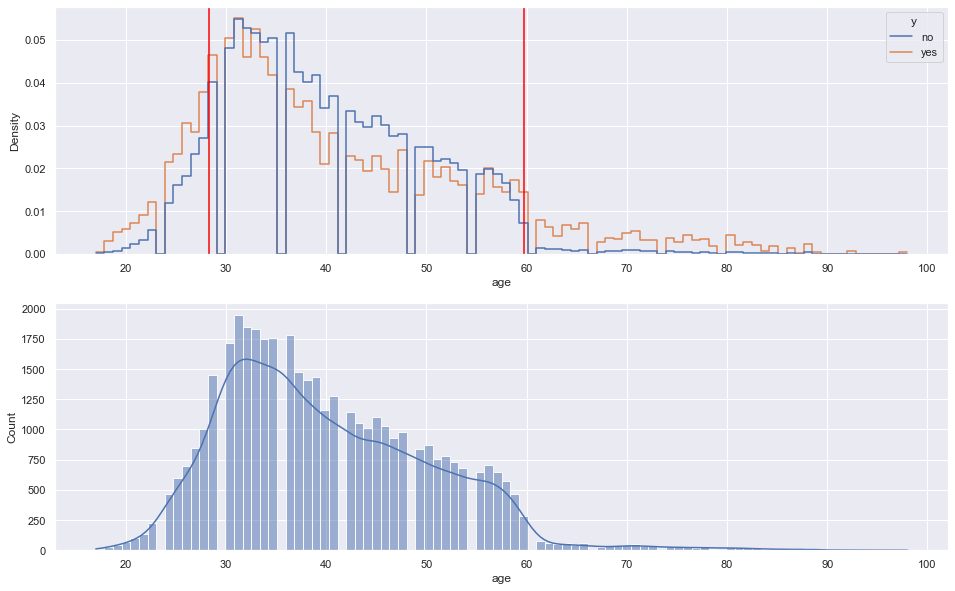

In [18]:
fig, ax = plt.subplots(2, 1, figsize = (16,10))
sns.histplot(data, x = feature, hue = "y", element="step", stat="density", common_norm = False,  fill=False, ax = ax[0])
ax[0].axvline(data.age.describe().quantile(q = 0.25), color='red')
ax[0].axvline(data.age.describe().quantile(q = 0.75), color='red')

#sns.boxplot(ax=ax[1], data = data[feature])  
sns.histplot(data=data, x=feature, kde=True, ax = ax[1])

plt.show()

**Important Inferences**

- It seems that the banks are **not very much interested by contacting the older population**. Even though, after the 60-years threshold, the relative frequency is higher when y = 1. In other words, we can say that **elderly persons** are more **likely to subscribe** to a term deposit.

- The minimum and maximum values are 17 and 98 but we can expect new observations outside this range.

- We will convert the continious variable **age** into nominal intervals i.e perform **Discretization**. We might lose some information from this continious-to-discrete transformation, but there wasn’t any clear pattern between years. Cutting into classes will make the algorithms easier to interpret later.

- We can discretize age feature as into three easily interpretable classes : 
    - **bin1**: age <= 30
    - **bin2**: age > 30 and age <= 60
    - **bin3**: age > 60

**2. Duration**

last contact duration, in seconds (numeric).

[...goto toc](#toc)

In [19]:
# Analysis of duration
feature = 'duration'

In [20]:
# Statistical summary of duration
data.duration.describe()

count    41176.000000
mean       258.315815
std        259.305321
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

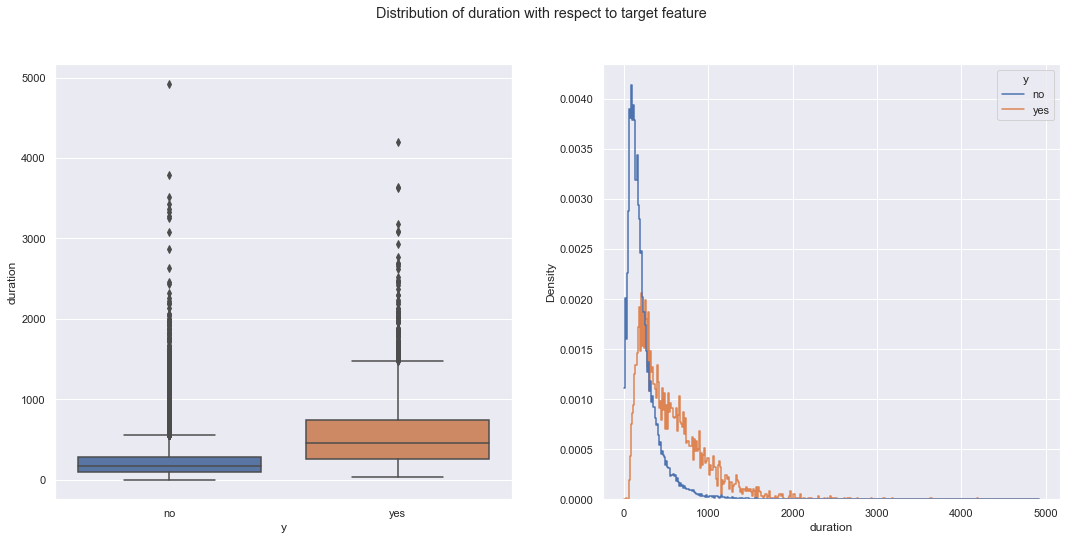

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (18,8))

fig.suptitle(f"Distribution of {feature} with respect to target feature")

sns.boxplot(data = data, y = feature, x = "y", ax = ax[0])
sns.histplot(data, x = feature, hue = "y", element="step", stat="density", common_norm = False,  fill=False, ax = ax[1])

plt.show()

**Observation:** 

- It can clearly see that **duration** attribute highly affects the output target (e.g., if duration = 0 then y="no"). 
- Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. 

Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**3. campaign**

number of contacts performed during this campaign and for this client (numeric, includes last contact)

[...goto toc](#toc)

In [22]:
# Analysis of campaign
feature = 'campaign'

In [23]:
# Statistical summary of duration
data.campaign.describe()

count    41176.000000
mean         2.567879
std          2.770318
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

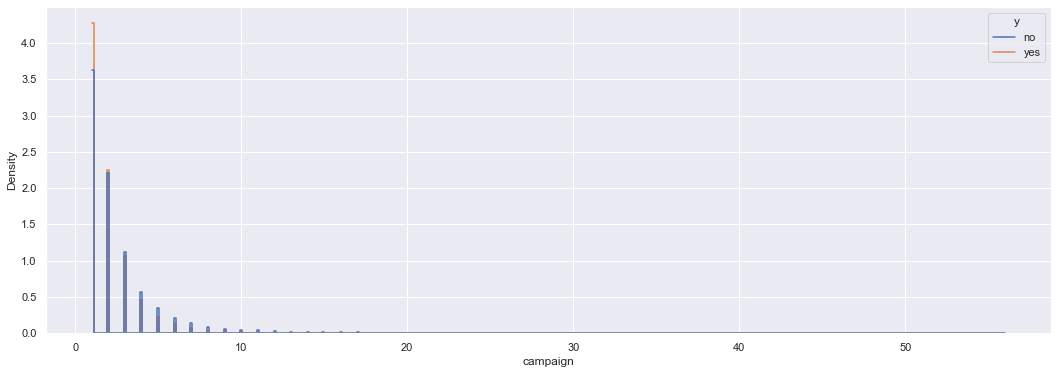

In [24]:
fig, ax = plt.subplots(1, figsize = (18,6))
sns.histplot(data, x = feature, hue = "y", element="step", stat="density", common_norm = False,  fill=False)
plt.show()

**Important Inferences**

- Calling the same person more than ten times during a single marketing campaign seems excessive. 
- We’ll consider those as outliers drop entries having campaign > 10



**4. pdays**

number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

[...goto toc](#toc)

In [25]:
# Analysis of pdays
feature = 'pdays'

In [26]:
# Statistical summary of pdays
data.pdays.describe()

count    41176.000000
mean       962.464810
std        186.937102
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

<AxesSubplot:xlabel='pdays', ylabel='Count'>

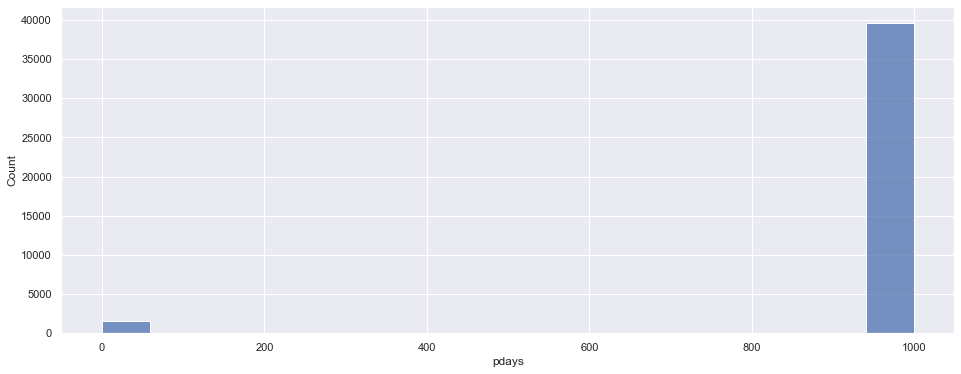

In [27]:
plt.figure(figsize = (16,6))
sns.histplot(x = feature, data = data)

**Observation**

As pdays indicates number of days that passed by after the client was last contacted from a previous campaign. The idea of contact with clients, in general, seems more important than days passed.

So we perform encoding where **999** value means the client wasn’t previously contacted. And if any previous contact was made with the cilent than it will be encoded as **1**.

**5. previous**

number of contacts performed before this campaign and for this client (numeric)

[...goto toc](#toc)

In [28]:
# Analysis of previous
feature = 'previous'

In [29]:
# Statistical summary of previous
data.previous.describe()

count    41176.000000
mean         0.173013
std          0.494964
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

<AxesSubplot:xlabel='previous', ylabel='proportion'>

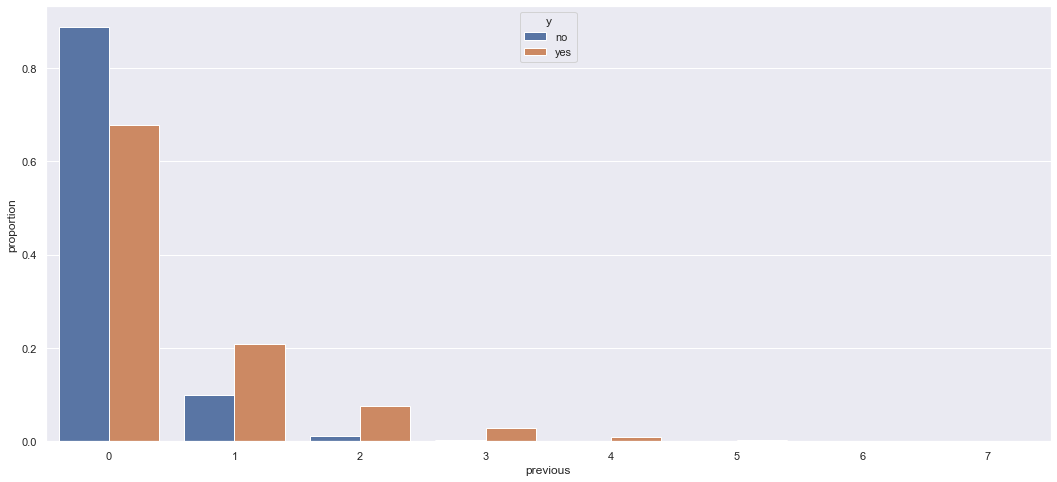

In [30]:
x, y, hue = feature, "proportion", "y"
hue_order = ["no", "yes"]

plt.figure(figsize = (18,8))
(data[x]
 .groupby(data[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

In [31]:
# Function to get percent increase in probabilty of yes after each contact
def get_percentage(data, feature):
    percentage = []
    for count in data[feature].unique().tolist():
        contact = data[data.previous == count]
        percent = contact[contact.y == "yes"].shape[0]
        percentage.append((percent) / contact.shape[0])
        
    return percentage

In [32]:
percentage = get_percentage(data, feature)

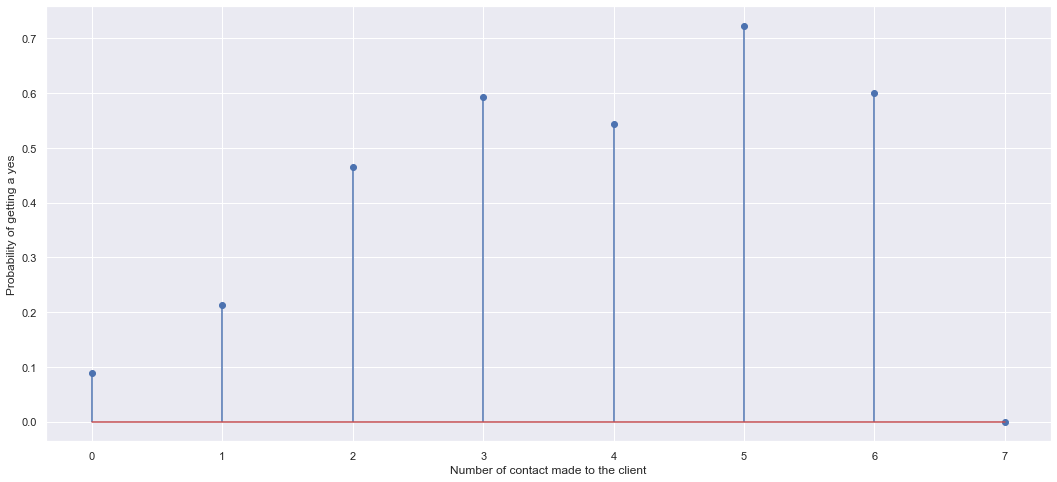

In [33]:
plt.figure(figsize = (18, 8))
plt.ylabel("Probability of getting a yes")
plt.xlabel("Number of contact made to the client")
plt.stem(percentage)
plt.show()

**Important Inferences**

- It can see that even one contact improves probability of “yes” (from 8.8% to 21.2%)

- We cannot have a 2nd contact without 1st or a 3rd contact without a 2nd

- Analyzing such types of variables can be tricky from a prediction stand-point

But we can clearly see that probability of yes increases till five calls so we should not perform label encoding for this feature. Instead we can perform binning and convert this feature into nominal feature having three bins:

- bin0 : previous == 0
- bin1 : previous >= 1 and previous <= 2
- bin3 : previous > 2


**6. emp.var.rate**

employment variation rate - quarterly indicator (numeric)

[...goto toc](#toc)

In [34]:
# Analysis of emp.var.rate
feature = 'emp.var.rate'

In [35]:
# Statistical summary of emp.var.rate
data['emp.var.rate'].describe()

count    41176.000000
mean         0.081922
std          1.570883
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

<AxesSubplot:xlabel='emp.var.rate', ylabel='Count'>

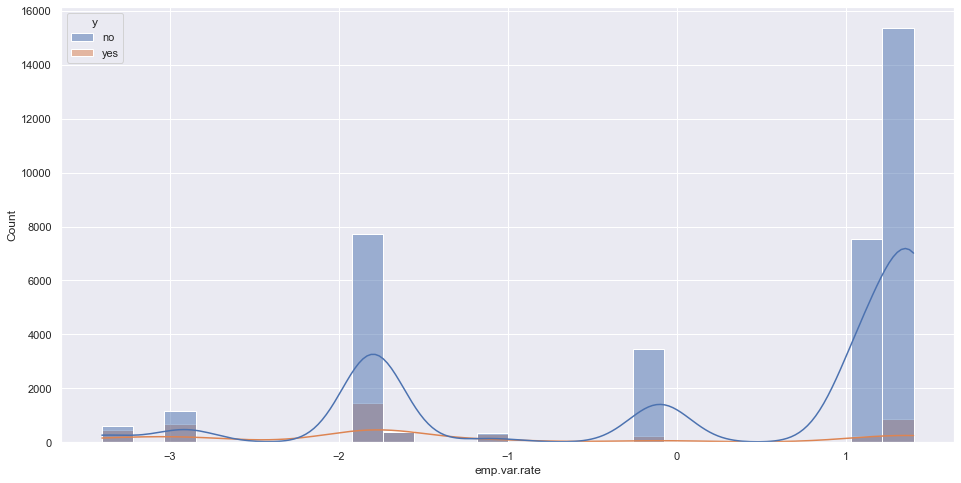

In [36]:
# Plot basis plots of emp.var.rate 
plt.figure(figsize = (16, 8))
sns.histplot(data = data, x = feature, hue = "y", kde = True)

**Note: We will perform logarithmic transformation by taking into consideration the negeative and positives values**

**7. cons.price.idx:**

consumer price index - monthly indicator (numeric)

*The **Consumer Price Index (CPI)** is a measure that examines the weighted average of prices of a basket of consumer goods and services, such as transportation, food, and medical care. It is calculated by taking price changes for each item in the predetermined basket of goods and averaging them.*

[...goto toc](#toc)

In [37]:
# Analysis of cons.price.idx
feature = 'cons.price.idx'

In [38]:
# Statistical summary of cons.price.idx
data['cons.price.idx'].describe()

count    41176.000000
mean        93.575720
std          0.578839
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

<AxesSubplot:xlabel='cons.price.idx', ylabel='Count'>

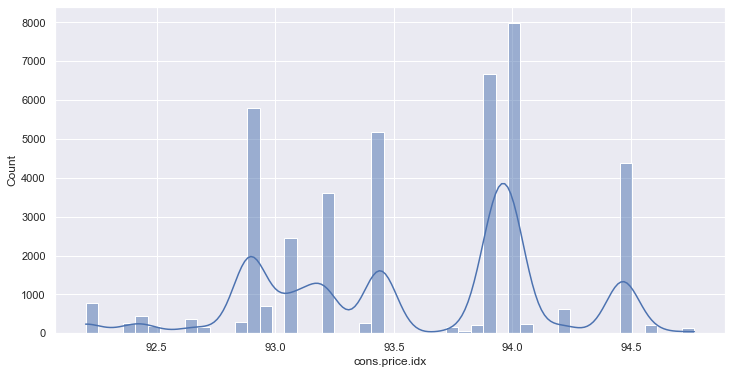

In [39]:
# Plot basis plots of cons.price.idx
plt.figure(figsize = (12, 6))
sns.histplot(data = data, x = feature, kde = True)

**8. cons.conf.idx**

consumer confidence index - monthly indicator (numeric)

*This **consumer confidence indicator** provides an indication of future developments of households’ consumption and saving, based upon answers regarding their expected financial situation, their sentiment about the general economic situation, unemployment and capability of savings.*

[...goto toc](#toc)

In [40]:
# Analysis of cons.conf.idx
feature = 'cons.conf.idx'

In [41]:
# Statistical summary of cons.price.idx
data['cons.conf.idx'].describe()

count    41176.000000
mean       -40.502863
std          4.627860
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

<AxesSubplot:xlabel='y', ylabel='cons.conf.idx'>

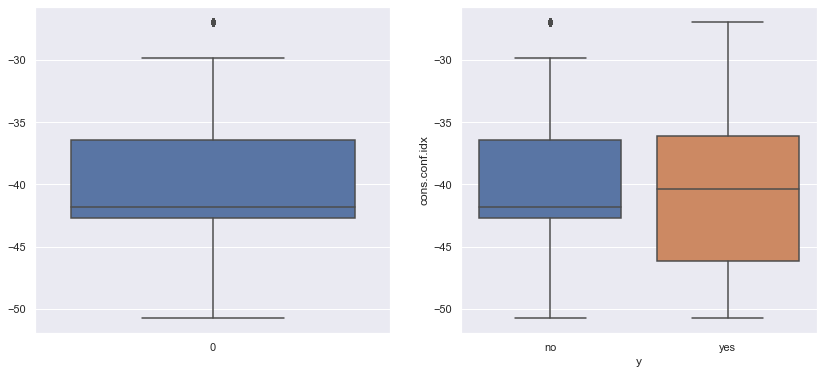

In [42]:
# Plot basis plots of cons.price.idx 
# Create subplots figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot of given feature
sns.boxplot(ax=axes[0], data = data[feature])  

# Boxplot of given feature with respect to output variable
sns.boxplot(ax=axes[1], y = feature, data = data, x = 'y')

**9. euribor3m**

euribor 3 month rate - daily indicator (numeric)

**Euribor** is short for **Euro Interbank Offered Rate**. *The Euribor rates are based on the average interest rates at which a large panel of European banks borrow funds from one another.*

[...goto toc](#toc)

In [43]:
# Analysis of euribor3m
feature = 'euribor3m'

In [44]:
# Statistical summary of euribor3m
data.euribor3m.describe()

count    41176.000000
mean         3.621293
std          1.734437
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

<AxesSubplot:xlabel='y', ylabel='euribor3m'>

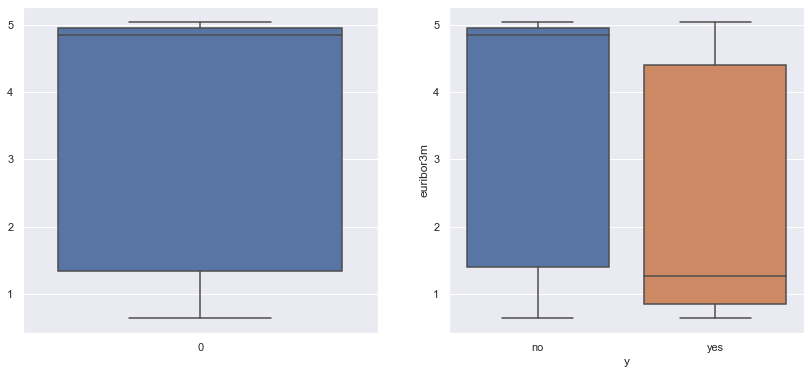

In [45]:
# Plot basis plots of euribor3m 
# Create subplots figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot of given feature
sns.boxplot(ax=axes[0], data = data[feature])  

# Boxplot of given feature with respect to output variable
sns.boxplot(ax=axes[1], y = feature, data = data, x = 'y')

**Note: There are no outliears in *euribor3m* feature. We will explore it more in further analysis to get clear picture of this feature.**

**10. nr.employed**

number of employees - quarterly indicator (numeric)

[...goto toc](#toc)

In [46]:
# Analysis of nr.employed
feature = 'nr.employed'

In [47]:
# Statistical summary of nr.employed
data['nr.employed'].describe()

count    41176.000000
mean      5167.034870
std         72.251364
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

<AxesSubplot:xlabel='y', ylabel='nr.employed'>

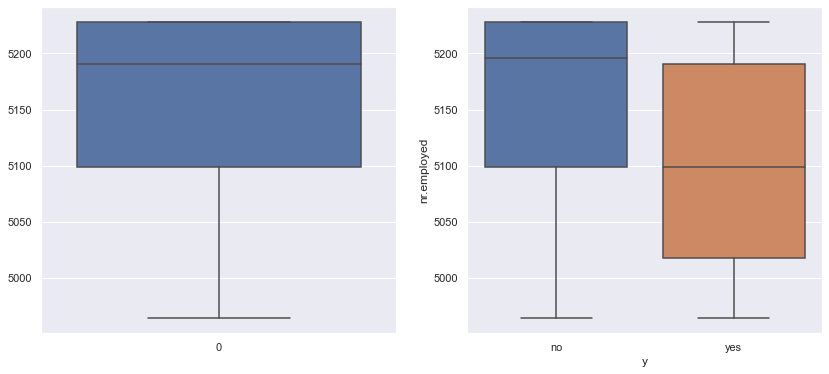

In [48]:
# Plot basis plots of nr.employed 
# Create subplots figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot of given feature
sns.boxplot(ax=axes[0], data = data[feature])  

# Boxplot of given feature with respect to output variable
sns.boxplot(ax=axes[1], y = feature, data = data, x = 'y')

**Note: There are no outliears in *nr.employed* feature. We will explore it more in further analysis to get clear picture of this feature.**

#### Correlation

In [49]:
# check correlation
corr = data.corr(method = 'spearman')
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.002017,0.005754,-0.001065,-0.012639,0.045064,0.044871,0.114313,0.054460,0.044845
duration,-0.002017,1.000000,-0.081101,-0.083056,0.042360,-0.069110,0.002872,-0.008637,-0.078221,-0.095135
campaign,0.005754,-0.081101,1.000000,0.055551,-0.087491,0.156419,0.096475,-0.001403,0.140634,0.144311
pdays,-0.001065,-0.083056,0.055551,1.000000,-0.509580,0.227741,0.056785,-0.077283,0.278530,0.290714
previous,-0.012639,0.042360,-0.087491,-0.509580,1.000000,-0.435385,-0.282791,-0.115981,-0.454800,-0.438791
emp.var.rate,0.045064,-0.069110,0.156419,0.227741,-0.435385,1.000000,0.664881,0.224840,0.939915,0.944687
cons.price.idx,0.044871,0.002872,0.096475,0.056785,-0.282791,0.664881,1.000000,0.245771,0.490945,0.464699
cons.conf.idx,0.114313,-0.008637,-0.001403,-0.077283,-0.115981,0.224840,0.245771,1.000000,0.236790,0.132812
euribor3m,0.054460,-0.078221,0.140634,0.278530,-0.454800,0.939915,0.490945,0.236790,1.000000,0.928853
nr.employed,0.044845,-0.095135,0.144311,0.290714,-0.438791,0.944687,0.464699,0.132812,0.928853,1.000000


<AxesSubplot:>

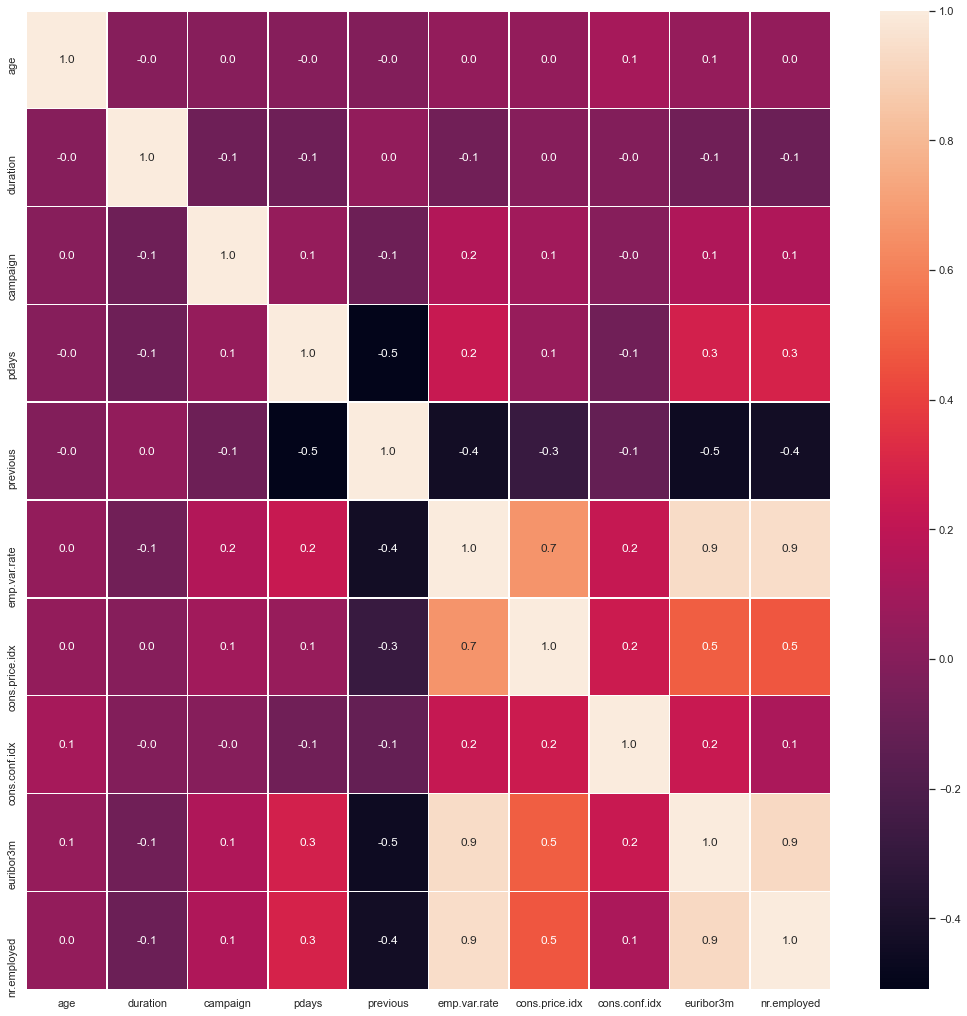

In [50]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f', ax=ax)

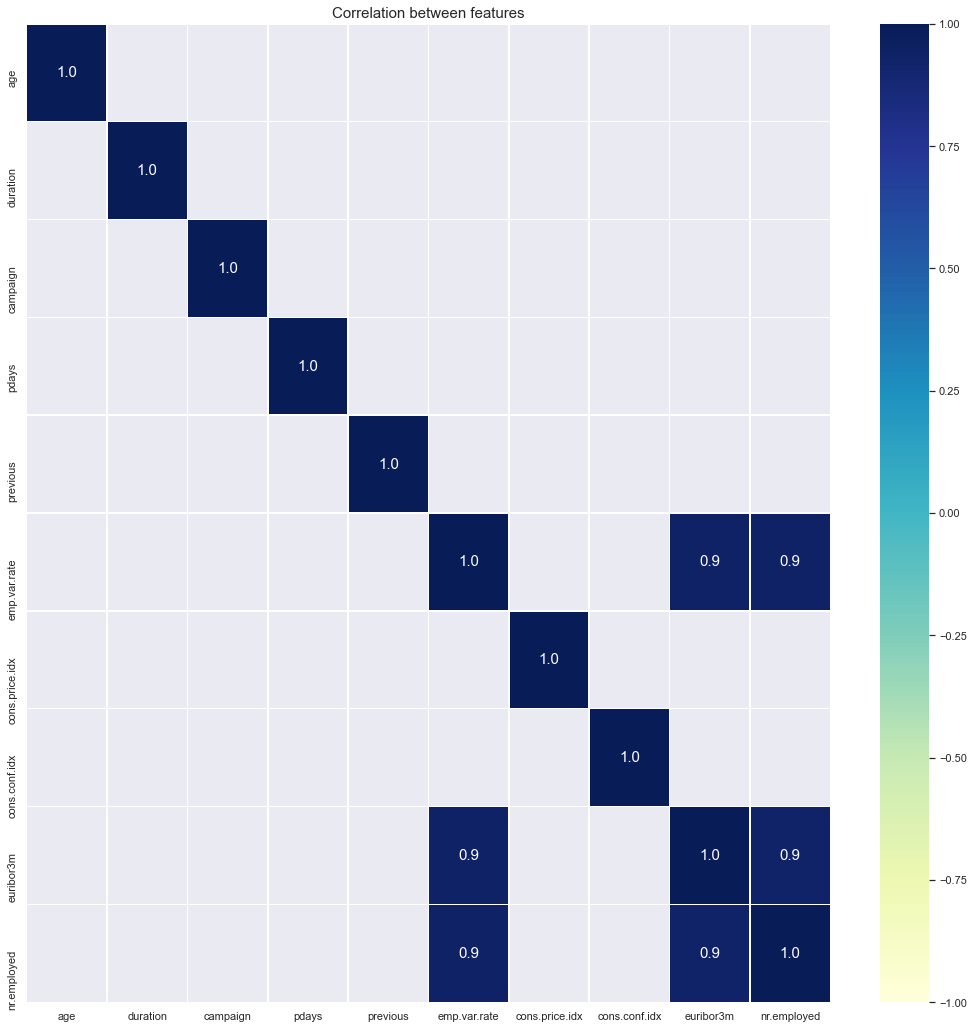

In [51]:
plt.figure(figsize=(18, 18))
sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15}, linewidths=.5, fmt= '.1f')
plt.title('Correlation between features', fontsize=15)
plt.show()

**Note:** Features **emp.var.rate**, **euribor3m** and **nr.employed** are highly correlated

<a id='categorical_features'></a>
### 4.4.2. Categorical Features

*Analysis of categorical features*

[...goto toc](#toc)

In [52]:
def plot_categorical_feature(data, feature, target = 'y'):
    labels = data[feature].unique().tolist()
        
    # Create subplots figure
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Plot pie chart to show distribution of feature
    axes[0].pie(data[feature].value_counts().values, labels = labels, autopct='%1.1f%%',startangle=90)
    axes[0].set_xlabel(feature, size=22)

    # Plot countplot of feature with respect to target
    sns.countplot(x = feature, data = data, hue = target, ax = axes[1], palette='rainbow')   

    # Show all plots
    plt.show()

In [53]:
# Function to create crosstable and plot the percentage
def generate_crosstable_plot(data, feature, target, color = "orange", linestyles = "--"):
    # Generate cross table
    cross_table = pd.crosstab(data[feature], data[target], margins=True, margins_name="Total")
    
    # Calculate and add percentage of yes said by each category
    cross_table["yes%"] = round((cross_table.yes * 100) / cross_table.Total, 1)
    
    # Sort the cross table
    cross_table.sort_values(by = "yes%", ascending = False, inplace = True)
    
    # Plot the figure
    plt.figure(figsize = (16,8))
    
    x = cross_table.index.values.tolist()
    y = cross_table["yes%"].values.tolist()
    
    # We need to remove percentage of Total
    del y[x.index("Total")]
    x.remove("Total")
    sns.pointplot(y = y, x = x, data = cross_table, linestyles = linestyles, color = color)
    plt.xlabel(f"Categories in {feature}")
    plt.ylabel(f"Percentage of getting a yes")
    plt.show()
    
    # return crosstable
    return cross_table

**1. Job**

type of job(categorical:"admin.","bluecollar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

[...goto toc](#toc)


In [54]:
# Analysis of job
feature = 'job'

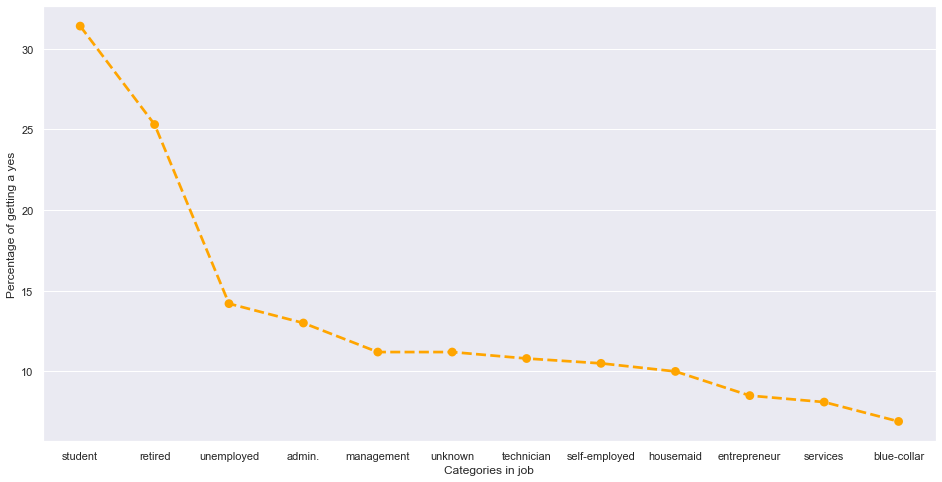

y,no,yes,Total,yes%
job,,,,
student,600,275,875,31.4
retired,1284,434,1718,25.3
unemployed,870,144,1014,14.2
admin.,9068,1351,10419,13.0
Total,36537,4639,41176,11.3
management,2596,328,2924,11.2
unknown,293,37,330,11.2
technician,6009,730,6739,10.8
self-employed,1272,149,1421,10.5


In [55]:
# Generate a cross table
generate_crosstable_plot(data, feature, 'y')

**Conclusion:**

- Higher response among students (31.4%) and retired people (25.2%).

- Other classes range between 6.9% (blue-collar) and 14.2 (unemployed).

- We also see that we can ignore “unknown”. No big effect seen here.

**2. marital**

marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

[...goto toc](#toc)


In [56]:
# Analysis of marital
feature = 'marital'

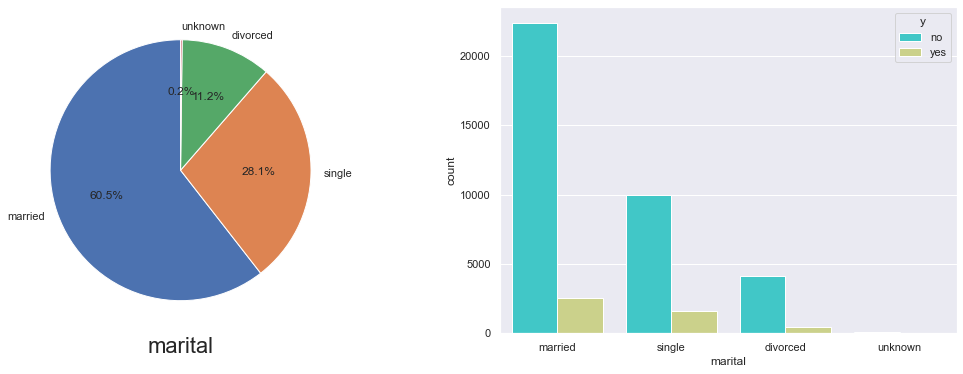

In [57]:
# Plot barplot of 'marital' with respect to 'y' feature
plot_categorical_feature(data,feature)

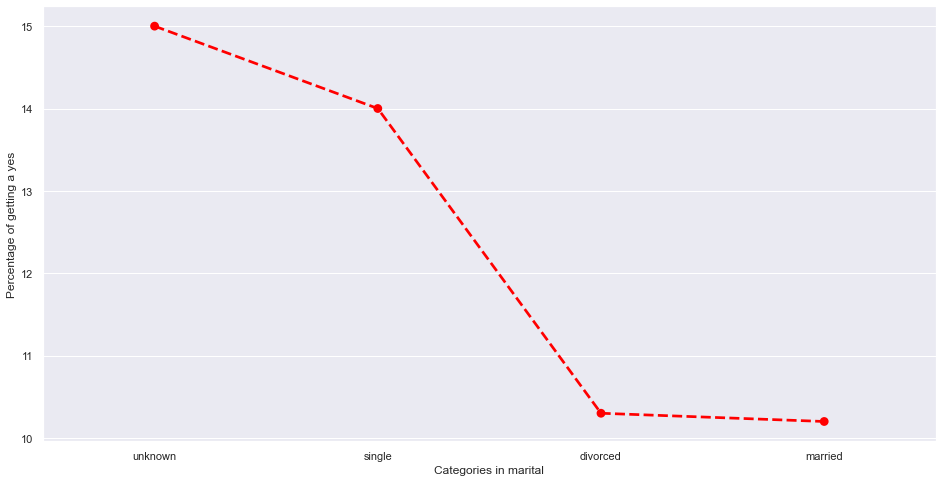

y,no,yes,Total,yes%
marital,,,,
unknown,68,12,80,15.0
single,9944,1620,11564,14.0
Total,36537,4639,41176,11.3
divorced,4135,476,4611,10.3
married,22390,2531,24921,10.2


In [58]:
# Generate a cross table
generate_crosstable_plot(data, feature, 'y', color = "red")

**Note:**

- Martial status should be classified into 3 categories - married, single and divorced
- *Unknown* is acting as as null value and should be handled
- No big effect of marriage of target feature is seen
- Singles (14.0%) slightly more like to say “yes” than divorced (10.3%) or married customers (10.2%).

**3. education**

education of individual (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

[...goto toc](#toc)

In [59]:
# Analysis of education
feature = 'education'

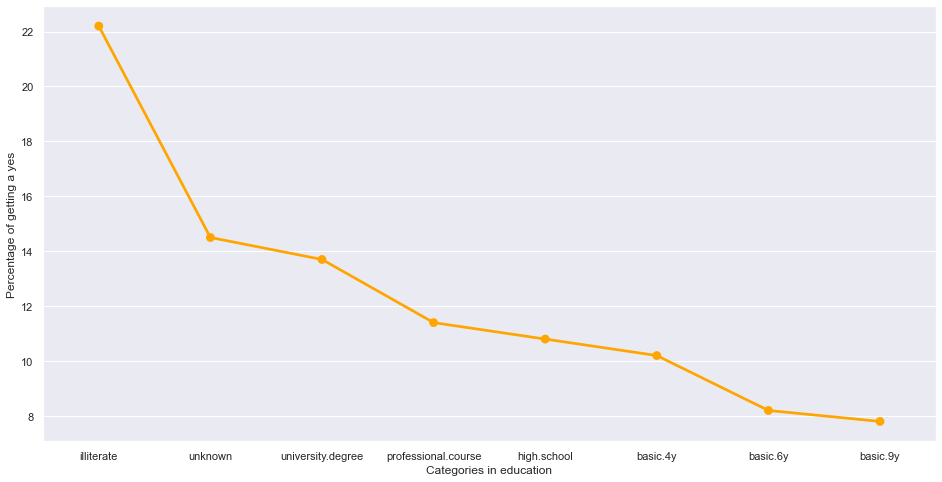

y,no,yes,Total,yes%
education,,,,
illiterate,14,4,18,22.2
unknown,1479,251,1730,14.5
university.degree,10495,1669,12164,13.7
professional.course,4645,595,5240,11.4
Total,36537,4639,41176,11.3
high.school,8481,1031,9512,10.8
basic.4y,3748,428,4176,10.2
basic.6y,2103,188,2291,8.2
basic.9y,5572,473,6045,7.8


In [60]:
# Generate a cross table
generate_crosstable_plot(data, feature, 'y', color = "orange", linestyles="-")

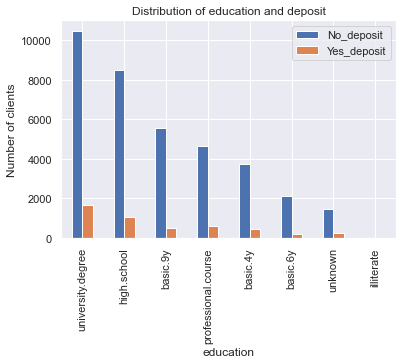

In [61]:
# Plot barplot of 'education' with respect to 'y' feature
temp_1 = pd.DataFrame() # temp dataframe 
    
# count categorical values
temp_1['No_deposit'] = data[data['y'] == 'no'][feature].value_counts()
temp_1['Yes_deposit'] = data[data['y'] == 'yes'][feature].value_counts()

# Plot barplot
temp_1.plot(kind='bar')
plt.xlabel(f'{feature}')
plt.ylabel('Number of clients')
plt.title('Distribution of {} and deposit'.format(feature))
plt.show()

**Note:**

- It appears that a positive correlation exists between the number of years of education and the odds of subscribing to a term deposit.

- Among the 1730 rows containing the “unknown” value, 251 of them subscribed to a term deposit. This is around 5% of the total group of subscribers.

- It might make sense to recode these as “university.degree holders” as they are the most similar (13.7%).

- Since the education qualification of the customers matters a lot, so it should be encoded properly


**4. default**

has credit in default? (categorical: "no","yes","unknown")

[...goto toc](#toc)

In [62]:
# Analysis of  default
feature = 'default'

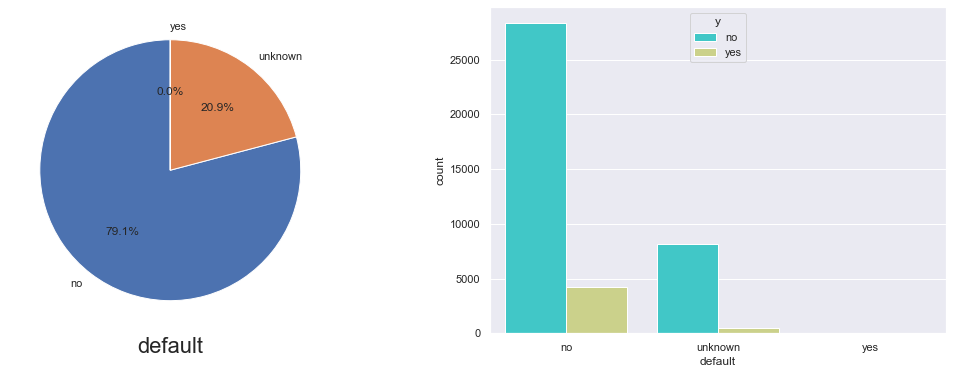

In [63]:
# Plot barplot of 'default' with respect to 'y' feature
plot_categorical_feature(data,feature)

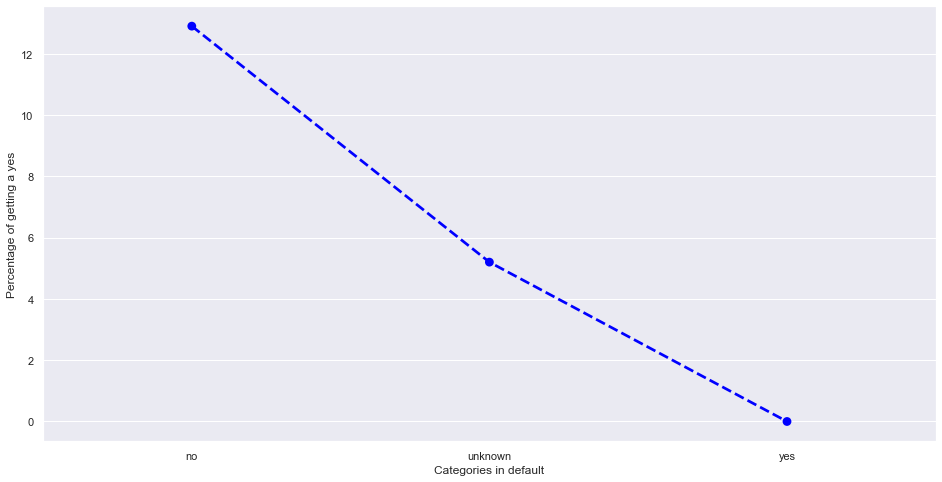

y,no,yes,Total,yes%
default,,,,
no,28381,4196,32577,12.9
Total,36537,4639,41176,11.3
unknown,8153,443,8596,5.2
yes,3,0,3,0.0


In [64]:
# Generate a cross table
generate_crosstable_plot(data, feature, 'y', color = "blue", linestyles="--")

**Important Inferences**

- Only 3 individuals replied “yes” to the question of having a credit in default. 
- People either answered “no” or didn’t even reply, which gives us zero information.
- So we need to drop this feature


**5. housing**

has housing loan? (categorical: "no","yes","unknown")

[...goto toc](#toc)

In [65]:
# Analysis of  housing
feature = 'housing'

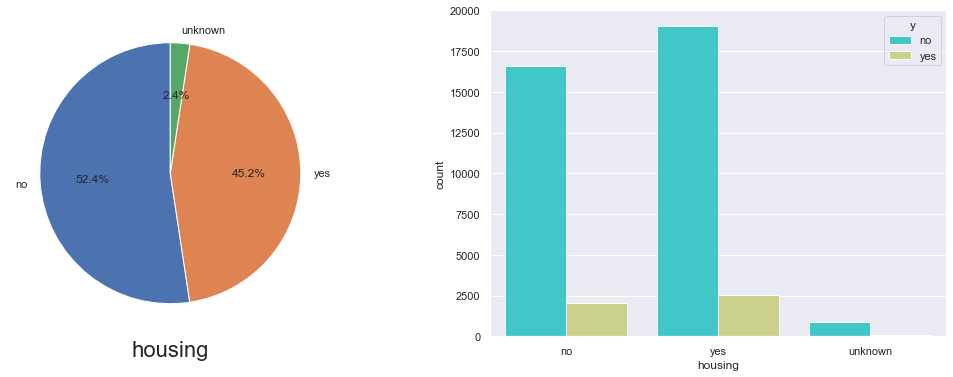

In [66]:
# Plot barplot of 'housing' with respect to 'y' feature
plot_categorical_feature(data,feature)

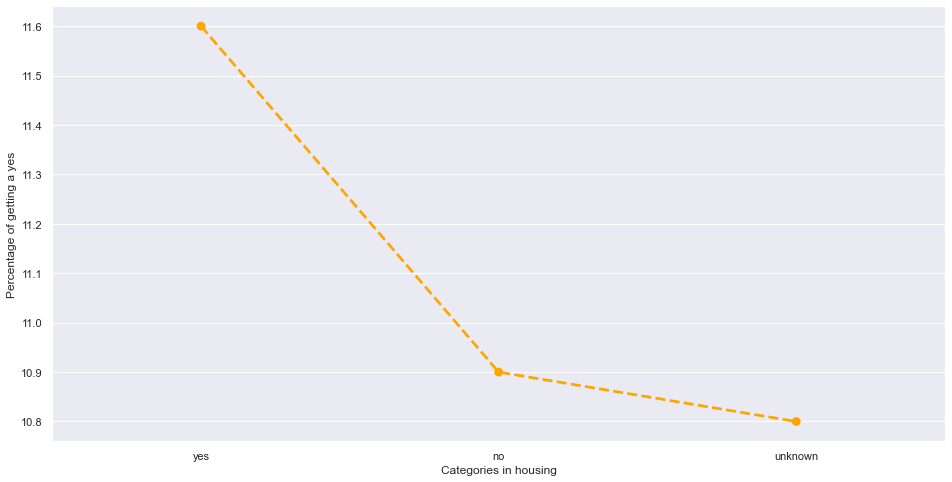

y,no,yes,Total,yes%
housing,,,,
yes,19064,2507,21571,11.6
Total,36537,4639,41176,11.3
no,16590,2025,18615,10.9
unknown,883,107,990,10.8


In [67]:
# Generate a cross table
generate_crosstable_plot(data, feature, 'y', color = "orange", linestyles="--")

**Note:** 

There is not much observable variation between those who have housing loans (11.6%) and those who do not(10.6%). So we can discard this feature.




**6. loan**

has personal loan? (categorical: "no","yes","unknown")

[...goto toc](#toc)

In [68]:
# Analysis of loan
feature = 'loan'

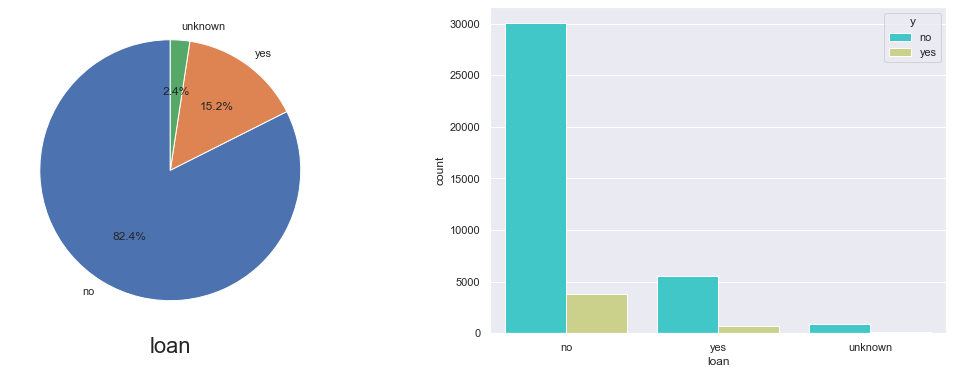

In [69]:
# Plot barplot of 'loan' with respect to 'y' feature
plot_categorical_feature(data,feature)

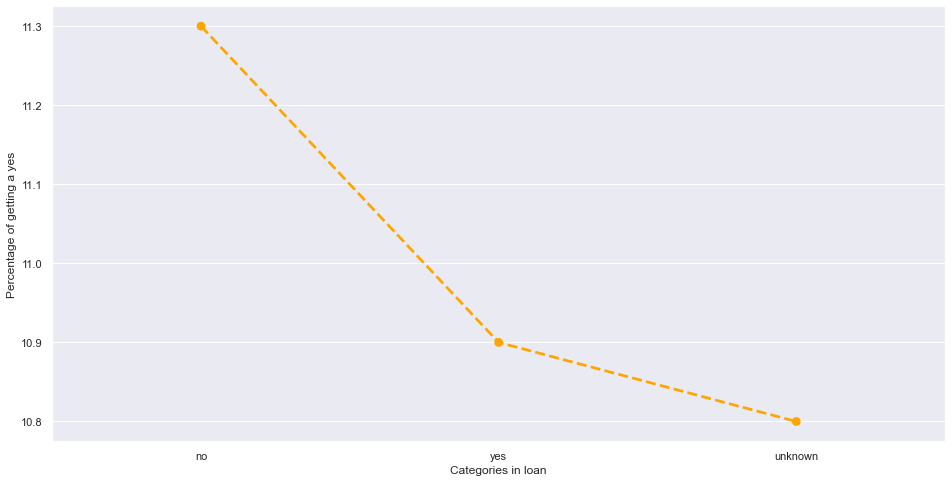

y,no,yes,Total,yes%
loan,,,,
no,30089,3849,33938,11.3
Total,36537,4639,41176,11.3
yes,5565,683,6248,10.9
unknown,883,107,990,10.8


In [70]:
# Generate a cross table
generate_crosstable_plot(data, feature, 'y', color = "orange", linestyles="--")

**Note:**

There is not much observable variation between those who have personal loans (10.9%) and those who do not(11.3%). So we can discard this feature.


**7. contact**

contact communication type (categorical: "cellular","telephone")
 
[...goto toc](#toc)

In [71]:
# Analysis of contact
feature = 'contact'

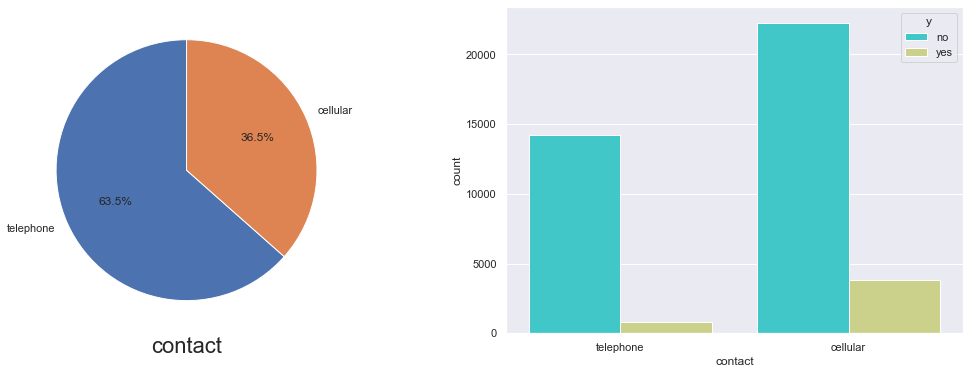

In [72]:
# Plot barplot of 'contact' with respect to 'y' feature
plot_categorical_feature(data,feature)

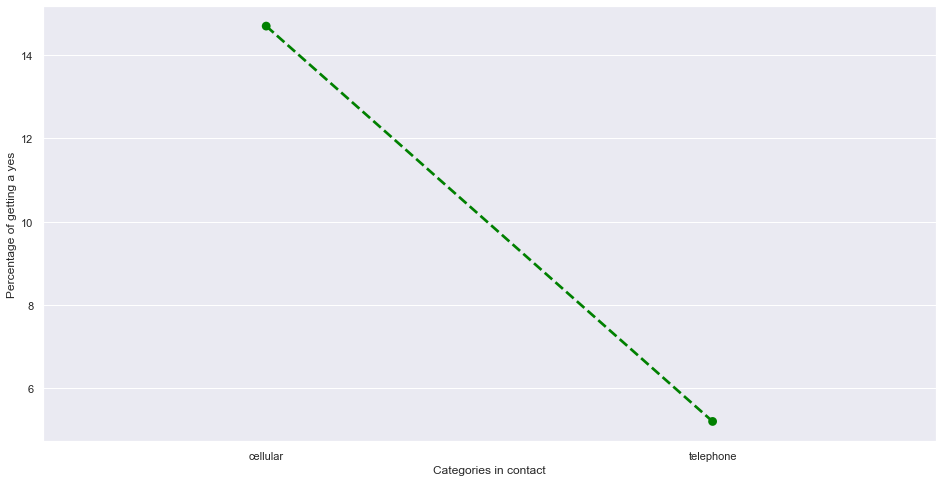

y,no,yes,Total,yes%
contact,,,,
cellular,22283,3852,26135,14.7
Total,36537,4639,41176,11.3
telephone,14254,787,15041,5.2


In [73]:
# Generate a cross table
generate_crosstable_plot(data, feature, 'y', color = "green", linestyles="--")

**Note:**

- 14.7% of cellular responders subscribed to a term deposit
- Only 5.2% of telephone responders did subscribed.


**8. month**

last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

[...goto toc](#toc)

In [74]:
# Analysis of month
feature = 'month'

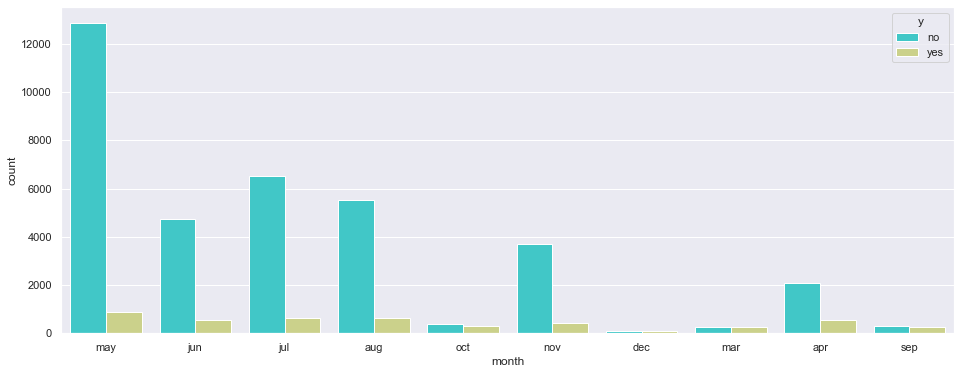

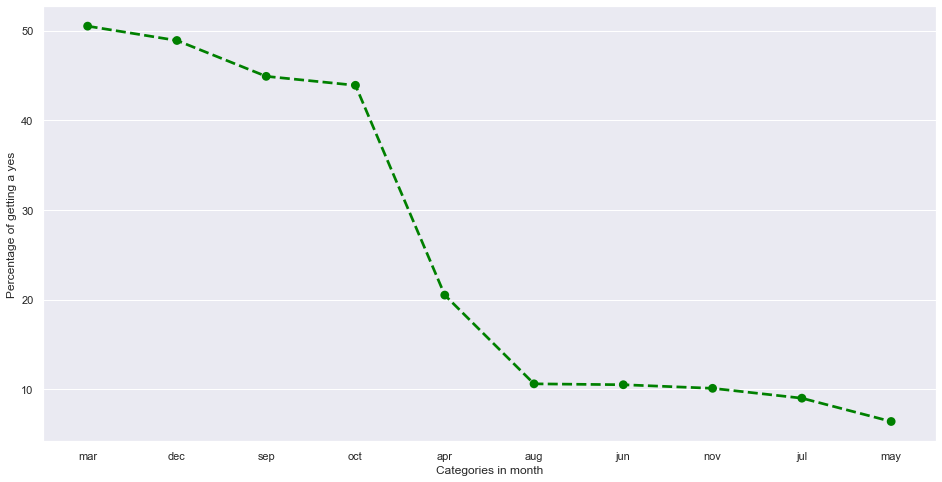

y,no,yes,Total,yes%
month,,,,
mar,270,276,546,50.5
dec,93,89,182,48.9
sep,314,256,570,44.9
oct,402,315,717,43.9
apr,2092,539,2631,20.5
Total,36537,4639,41176,11.3
aug,5521,655,6176,10.6
jun,4759,559,5318,10.5
nov,3684,416,4100,10.1


In [75]:
# Create subplots figure
fig, axes = plt.subplots(1, figsize=(16, 6))

# Plot countplot of feature with respect to target
sns.countplot(x = feature, data = data, hue = 'y', palette='rainbow')   

# Show the plot
plt.show()

# Generate a cross table
generate_crosstable_plot(data, feature, 'y', color = "green", linestyles="--")

**Important Inferences**

- Most of the calls were in May but there is higher percentage of yes from the customer in the month of March, September, October, and in December.
- We also notice that no contact has been made during January and February.
- The highest spike occurs during May, with 13767 i.e 33.4% of total contacts, but it has the worst ratio of subscribers over persons contacted (6.4%).
- Every month with a very low frequency of contact (March, September, October and December) shows very good results (between 44% and 51% of subscribers).
- We can say that this feature will probably be very important for prediction



**9. day_of_week**

last contact day of the week (categorical: "mon","tue","wed","thu","fri")

[...goto toc](#toc)

In [76]:
# Analysis of day_of_week
feature = 'day_of_week'

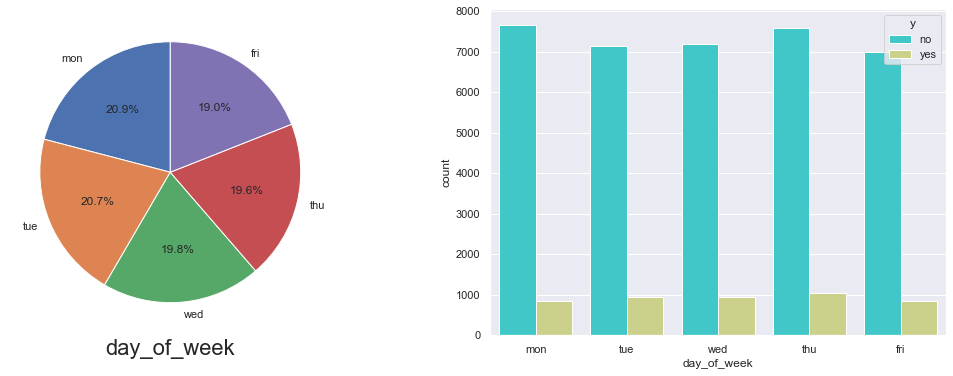

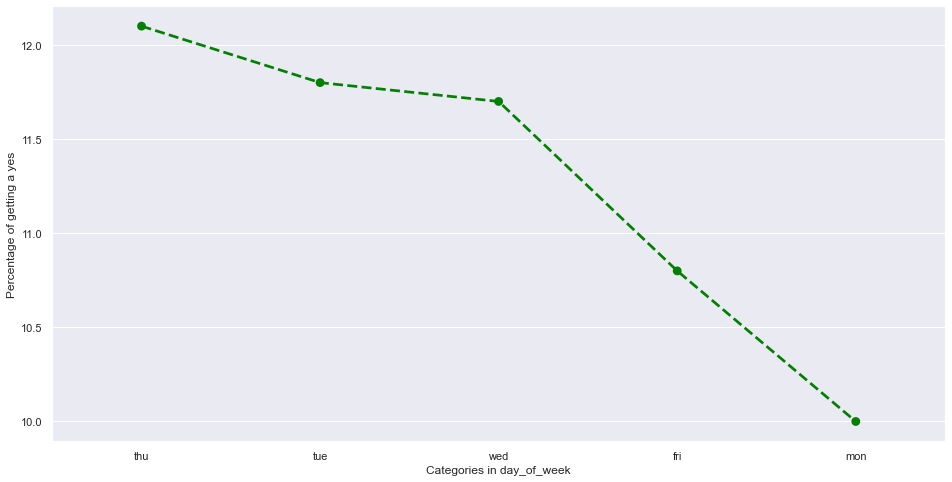

y,no,yes,Total,yes%
day_of_week,,,,
thu,7574,1044,8618,12.1
tue,7133,953,8086,11.8
wed,7185,949,8134,11.7
Total,36537,4639,41176,11.3
fri,6980,846,7826,10.8
mon,7665,847,8512,10.0


In [77]:
# Plot barplot of 'day_of_week' with respect to 'y' feature
plot_categorical_feature(data,feature)

# Generate a cross table
generate_crosstable_plot(data, feature, 'y', color = "green", linestyles="--")

**Observations**

- Calls aren’t made during weekend days. If we assume that calls are evenly distributed between the different weekdays, Thursdays tend to show better results (12.1% of subscribers among calls made this day) unlike Mondays with only 9.9% of successful calls.
- However, those differences are small, which makes this feature not that important.


**10. poutcome**

outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

[...goto toc](#toc)

In [78]:
# Analysis of poutcome
feature = 'poutcome'

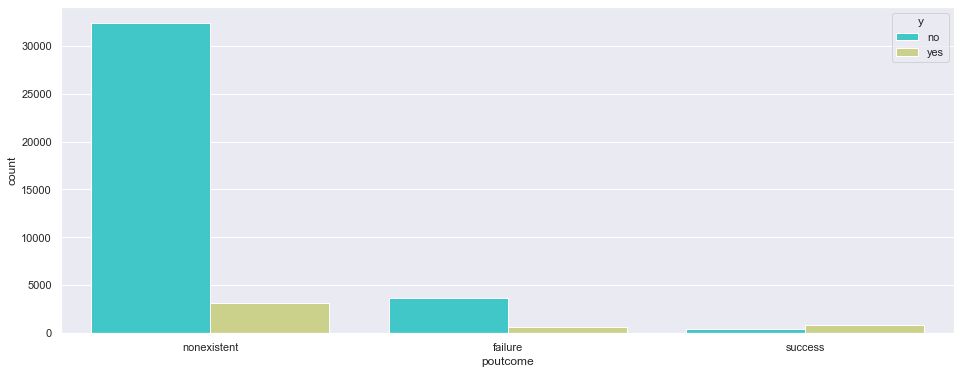

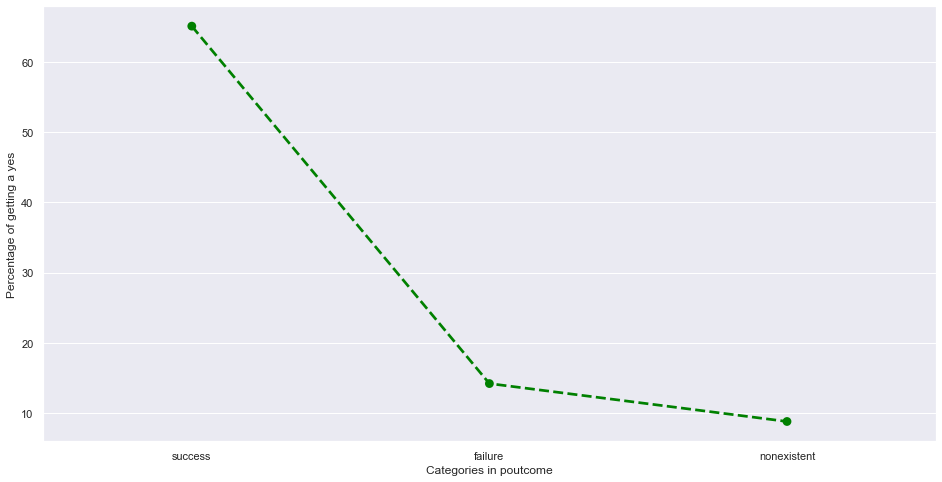

y,no,yes,Total,yes%
poutcome,,,,
success,479,894,1373,65.1
failure,3647,605,4252,14.2
Total,36537,4639,41176,11.3
nonexistent,32411,3140,35551,8.8


In [79]:
# Create subplots figure
fig, axes = plt.subplots(1, figsize=(16, 6))

# Plot countplot of feature with respect to target
sns.countplot(x = feature, data = data, hue = 'y', palette='rainbow')   

# Show the plot
plt.show()

# Generate a cross table
generate_crosstable_plot(data, feature, 'y', color = "green", linestyles="--")

**Note:**

- 65.1% of people who already subscribed to a term deposit after a previous contact have accepted to do it again.
- Even if they were denied before, they’re still more enthusiastic to accept it (14.2%) than people who haven’t been contacted before (8.8%).
- So even if the previous campaign was a failure, recontacting people seems important.

<a id='report'></a>
### 3.3.3. Analysis Report

[...goto toc](#toc)


<hr style="border:1.2px solid gray"> </hr>
<h3><center>Exploratory Data Analysis</center></h3>
<hr style="border:1.2px solid gray"> </hr>

| Number of Instances | Number of Attributes | Numeric Features | Categorical Features | Target Feature | Missing Values |
| :-: | :-: | :-: | :-: | :-: | :-: |
| 41176  | 21 | 10 | 11  | y (binary) | 12718 |

<hr>

#### Numeric Features 

- **Age**: It seems that the banks are not very much interested by contacting the older population. Even though, after the 60-years threshold, the relative frequency is higher when y = 1. In other words, we can say that elderly persons are more likely to subscribe to a term deposit.
- **Duration**: It can clearly see that duration attribute highly affects the output target (e.g., if duration = 0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, it should be discarded.
- In **pdays** feature, we should encode '999' as '0' which means that client was not previously contacted as other as '1'
- **pervious** - Even one contact improves probability of “yes” (from 8.8% to 21.2%). But We cannot have a 2nd contact without 1st or a 3rd contact without a 2nd. So we need to perform binning.
- In **emp.var.rate** we should perform logarithmic transformation by taking into consideration the negeative and positives values
- For feature **cons.price.idx**, we should first multiply it by 10 and then perform logarithmic transformation
- In feature **cons.conf.idx** all values are negeative so we should first convert them into positive and then should perform logarithmic transformation
- In feature **nr.employed** the values are on higher scale i.e thousand scale, so they should be reduced on lower scale using logarithmic tranformation
-  Higly correlated features (**employment rate**, **consumer confidence index**, **consumer price index**) may describe clients state from different social-economic angles. Their variance might support model capacity for generalization.
<hr>

#### Categorical Features

- **job**: Higher response among students (31.4%) and retired people (25.2%). Other classes range between 6.9% (blue-collar) and 14.2 (unemployed).
- **marital**: Singles (14.0%) slightly more like to say “yes” than divorced (10.3%) or married customers (10.2%).
- **default**: Only 3 individuals replied “yes” to the question of having a credit in default. People either answered “no” or didn’t even reply, which gives us zero information. So we can drop this feature.
- **housing**: There is not much observable variation between those who have housing loans (11.6%) and those who do not(10.6%). So we can discard this feature.
- **loan**: There is not much observable variation between those who have personal loans (10.9%) and those who do not(11.3%). So we can discard this feature.
- **contact**: 14.7% of cellular responders subscribed to a term deposit. Only 5.2% of telephone responders did subscribed.
- **month**: 
    - Most of the calls were in May but there is higher percentage of yes from the customer in the month of March, September, October, and in December. 
    - There was no contact made during January and February. The highest spike occurs during May, with 13767 i.e 33.4% of total contacts, but it has the worst ratio of subscribers over persons contacted (6.4%).
    - Every month with a very low frequency of contact (March, September, October and December) shows very good results (between 44% and 51% of subscribers).
- **day_of_week**: Calls aren’t made during weekend days. If we assume that calls are evenly distributed between the different weekdays, Thursdays tend to show better results (12.1% of subscribers among calls made this day) unlike Mondays with only 9.9% of successful calls. However, those differences are small, which makes this feature not that important.

- **poutcome**: 
    - 65.1% of people who already subscribed to a term deposit after a previous contact have accepted to do it again.
    - Even if they were denied before, they’re still more enthusiastic to accept it (14.2%) than people who haven’t been contacted before (8.8%).
    - So even if the previous campaign was a failure, recontacting people seems important.

In [97]:
# Create the copy of the dataset
data_1 = data.copy(deep = True)

In [98]:
# Features to be dropped 
drop_list = ['duration', "marital", "default", "housing", "loan", "day_of_week"]
data_1.drop(drop_list, axis = 1, inplace = True)

In [99]:
# labeling contact and potcome
data_1.contact = data_1.contact.map({'cellular': 1, 'telephone': 0}).astype('uint8') 
data_1.poutcome = data_1.poutcome.map({'nonexistent':0, 'failure':0, 'success':1}).astype('uint8') 

In [100]:
# drop outliears of campaign
data_1 = data_1[data_1.campaign < 10].reset_index(drop = True)

In [101]:
# Handling pdays
data_1.loc[data_1.pdays == 999, 'pdays'] = 0
data_1.loc[data_1.pdays != 999, 'pdays'] = 1

# Perform discretization on previous
data_1.loc[data_1.previous == 0, 'previous'] = 0
data_1.loc[data_1[(data_1['previous'] >= 1) & (data_1['previous'] <= 2)].index, 'previous'] = 1
data_1.loc[data_1.previous > 2, 'previous'] = 2

In [102]:
# change the range of Var Rate
data_1['emp.var.rate'] = data_1['emp.var.rate'].apply(lambda x: x*-0.0001 if x > 0 else x*1)
data_1['emp.var.rate'] = data_1['emp.var.rate'] * -1
data_1['emp.var.rate'] = data_1['emp.var.rate'].apply(lambda x: -np.log(x) if x < 1 else np.log(x)).astype('uint8')

# Multiply consumer index 
data_1['cons.price.idx'] = (data_1['cons.price.idx'] * 10).astype('uint8')

# change the sign (we want all be positive values)
data_1['cons.conf.idx'] = data_1['cons.conf.idx'] * -1

# re-scale variables
data_1['nr.employed'] = np.log2(data_1['nr.employed']).astype('uint8')
data_1['cons.price.idx'] = np.log2(data_1['cons.price.idx']).astype('uint8')
data_1['cons.conf.idx'] = np.log2(data_1['cons.conf.idx']).astype('uint8')

data_1['age'] = np.log(data_1['age'])

# Reduce meemory consumption
data_1.euribor3m = data_1.euribor3m.astype('uint8')
data_1.campaign = data_1.campaign.astype('uint8')
data_1.pdays = data_1.pdays.astype('uint8')

In [103]:
# fucntion to perform One Hot Encoding
def encode(data, col):
    return pd.concat([data, pd.get_dummies(col, prefix=col.name)], axis=1)

# One Hot encoding of 3 variable 
data_1 = encode(data_1, data_1.job)
data_1 = encode(data_1, data_1.month)

In [104]:
# Drop tranfromed features
data_1.drop(['job', 'month'], axis=1, inplace=True)

In [105]:
# Convert target variable into numeric
data_1.y = data_1.y.map({'no':0, 'yes':1})

In [106]:
# Target encoder for features - 'marital' and 'education'
import category_encoders as ce

# save target variable before transformation
y = data_1.y

# Create target encoder object and transoform two value
target_encode = ce.target_encoder.TargetEncoder(cols=['education']).fit(data_1, y)
cleaned_data = target_encode.transform(data_1)

In [107]:
# Create final data
cleaned_data = cleaned_data.drop('y', axis = 1)
y = data_1['y']
cleaned_data.head()

,age,education,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,4.025352,0.104356,0,1,1,0,0,9,7,5,...,0,0,0,0,0,0,1,0,0,0
1,4.043051,0.110715,0,1,1,0,0,9,7,5,...,0,0,0,0,0,0,1,0,0,0
2,3.610918,0.110715,0,1,1,0,0,9,7,5,...,0,0,0,0,0,0,1,0,0,0
3,3.688879,0.084041,0,1,1,0,0,9,7,5,...,0,0,0,0,0,0,1,0,0,0
4,4.025352,0.110715,0,1,1,0,0,9,7,5,...,0,0,0,0,0,0,1,0,0,0


In [108]:
cleaned_data.shape

(40082, 34)

In [109]:
y.shape

(40082,)

<a id='Feature_Selection'></a>
## 4.3. Feature Selection

Since there are all together **43** independent features we need to perform feature selection to eliminate curse of dimensionality

[...goto toc](#toc)


In [110]:
# Import required functions for feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [111]:
# Initialize the feature selector in our case Random Forest Classifier
feature_selector = SelectFromModel(RandomForestClassifier(n_estimators = 100))

# Fit the selector of the data
feature_selector.fit(cleaned_data, y)

SelectFromModel(estimator=RandomForestClassifier())

In [112]:
# Get best features
selected_feature = cleaned_data.columns[(feature_selector.get_support())]

In [113]:
print(f"Only \033[4m\033[1m{len(selected_feature)}\033[0m\033[0m features are selected from {cleaned_data.shape[1]}")
print(f"\nSelected features are : {list(selected_feature)}")

Only 7 features are selected from 34

Selected features are : ['age', 'education', 'campaign', 'previous', 'poutcome', 'emp.var.rate', 'euribor3m']


In [114]:
# Filter dataset with resepect to selected features
x = cleaned_data[selected_feature]
x.head()

,age,education,campaign,previous,poutcome,emp.var.rate,euribor3m
0,4.025352,0.104356,1,0,0,9,4
1,4.043051,0.110715,1,0,0,9,4
2,3.610918,0.110715,1,0,0,9,4
3,3.688879,0.084041,1,0,0,9,4
4,4.025352,0.110715,1,0,0,9,4


In [115]:
features = x.columns.values.tolist()

no_features = len(features)

<a id='data_transformation'></a>
## 4.4. Data Transformation

[...goto toc](#toc)



<a id='SMOTE'></a>
### 4.4.1 Handling unbalanced target feature (SMOTE)

*SMOTE is an oversampling technique that generates synthetic samples from the minority class. It is used to obtain a synthetically class-balanced or nearly class-balanced training set, which is then used to train the classifier.*

Since there are all together **44** independent features we need to perform feature selection to eliminate curse of dimensionality

[...goto toc](#toc)



Number of Client subscribed :  35482
Number of Clients not subscribed  :  4600


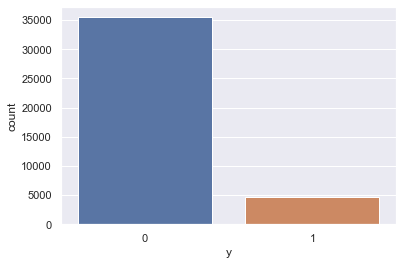

In [116]:
ax = sns.countplot(x = y,label="Count")     
Y, N = y.value_counts()
print('Number of Client subscribed : ', Y)
print('Number of Clients not subscribed  : ', N)

**Note:**

As we can see from the plot that data is **highly imbalanced**. And we built model based on this dataset then I will be baised. To avoid this we will apply oversamplying technique **SMOTE**.

In [117]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

In [118]:
# summarize class distribution
counter = Counter(y)
print(f"Current count of target features: {counter}")

Current count of target features: Counter({0: 35482, 1: 4600})


In [119]:
# Initalize smote object
oversample = SMOTE()

# Perform fit and resample on target feature
X, y = oversample.fit_resample(x, y)

In [120]:
counter = Counter(y)
print(f"Count of target feature after resampling : {counter}")

Count of target feature after resampling : Counter({0: 35482, 1: 35482})


Number of Client subscribed :  35482
Number of Clients not subscribed  :  35482


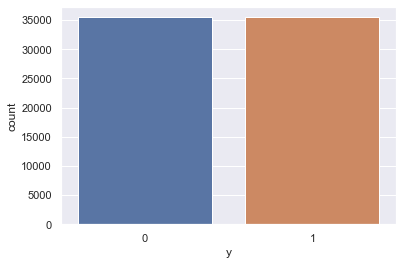

In [121]:
ax = sns.countplot(x = y, label="Count")     
Y, N = y.value_counts()
print('Number of Client subscribed : ', Y)
print('Number of Clients not subscribed  : ', N)

**After applying SMOTE, we can see that target feature is balanced now we can move further**

<a id='normalization'></a>
### 4.4.2 Normalization

*Normalization is used to scale the data of an attribute so that it falls in a smaller range, such as -1.0 to 1.0 or 0.0 to 1.0. It is generally useful for classification algorithms.*

We will use *Standard Scaler* to perform normalization.

[...goto toc](#toc)


In [122]:
# Import the required function
from sklearn.preprocessing import StandardScaler

In [123]:
# Initilize scaler
scaler = StandardScaler()

# fit the scaler
scaler.fit(X)

StandardScaler()

In [124]:
# Transform the dataset
X = scaler.fit_transform(X)

<a id='split_the_dataset'></a>
### 4.4.3 Split dataset

We will be splitting the dataset into train and test set with **70-30** split

[...goto toc](#toc)


In [125]:
# Import trai test plit function
from sklearn.model_selection import train_test_split

In [126]:
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)

# print the shape of 'x_train'
print("X_train : ",X_train.shape)

# print the shape of 'x_test'
print("X_test : ",X_test.shape)

# print the shape of 'y_train'
print("y_train : ",y_train.shape)

# print the shape of 'y_test'
print("y_test : ",y_test.shape)

X_train :  (60319, 7)
X_test :  (10645, 7)
y_train :  (60319,)
y_test :  (10645,)


<a id='model_development'></a>
## 4. Model Development

We will be training different classification model and choose the one with best performance

[...goto toc](#toc)


In [127]:
# Import packages to calculate performance of the models
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

<a id="Logistic_Regression"> </a>
### 4.1 Logistic Regression

*Training a logistic regression classifier*

[...goto toc](#toc)

In [128]:
# Import Logistic regressor 
from sklearn.linear_model import LogisticRegression

In [129]:
# Initialize the regressor
logistic = LogisticRegression()

In [130]:
# Fit the model on training set
logistic.fit(X_train,y_train)

LogisticRegression()

In [131]:
# predict the values
y_pred = logistic.predict(X_test)

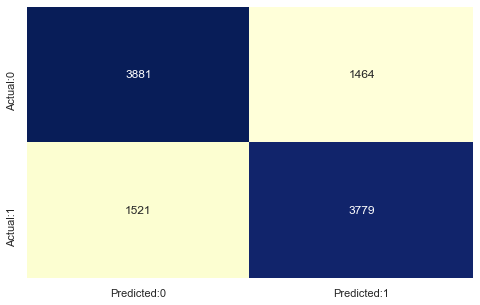

In [132]:
# Compute the accuracy

# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [133]:
# Generate classiffication report

# accuracy measures by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      5345
           1       0.72      0.71      0.72      5300

    accuracy                           0.72     10645
   macro avg       0.72      0.72      0.72     10645
weighted avg       0.72      0.72      0.72     10645



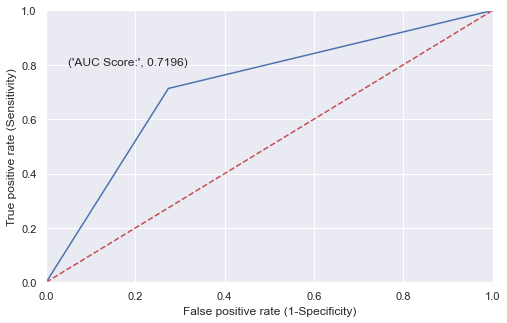

In [134]:
# Get and plot roc curve
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(roc_auc_score(y_test, y_pred),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [135]:
# Tabulate the result
from sklearn import metrics

# create a list of column names
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
logistic_regression_estimator = pd.Series({'Model': "Logistic Regression",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(logistic_regression_estimator , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.719559,0.720771,0.713019,0.719587,0.716874


<a id="AdaBoost"> </a>
## 4.2 AdaBoost

[...goto toc](#toc)

In [136]:
# Import Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

In [137]:
# build the model
adaboost = AdaBoostClassifier(random_state=10)

# fit the model
adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=10)

In [138]:
# predict the values
y_pred_adaboost  = adaboost.predict(X_test)

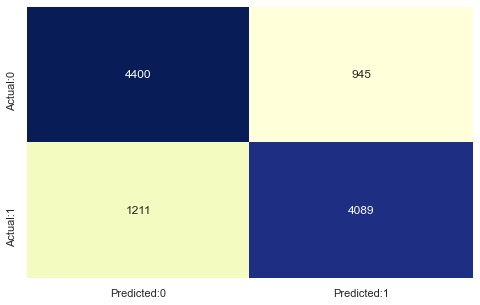

In [139]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_adaboost)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [140]:
# Generate classification report
result = classification_report(y_test, y_pred_adaboost)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      5345
           1       0.81      0.77      0.79      5300

    accuracy                           0.80     10645
   macro avg       0.80      0.80      0.80     10645
weighted avg       0.80      0.80      0.80     10645



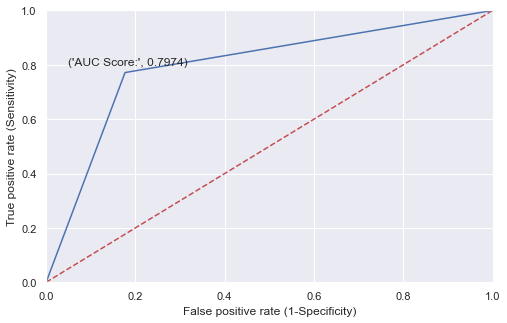

In [141]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_adaboost)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_adaboost),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [142]:
# create the result table for all scores
adaboost_metrics = pd.Series({'Model': "AdaBoost",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_adaboost),
                 'Precision Score': metrics.precision_score(y_test, y_pred_adaboost),
                 'Recall Score': metrics.recall_score(y_test, y_pred_adaboost),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_adaboost),
                  'f1-score':metrics.f1_score(y_test, y_pred_adaboost)})



# appending our result table
result_tabulation = result_tabulation.append(adaboost_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.719559,0.720771,0.713019,0.719587,0.716874
1,AdaBoost,0.797354,0.812277,0.771509,0.797464,0.791368


<a id="Naive_Bayes"> </a>
## 4.3 Naive Bayes

[...goto toc](#toc)

In [143]:
# Import Naive bayes classifier
from sklearn.naive_bayes import GaussianNB

# build the model
GNB = GaussianNB()

# fit the model
GNB.fit(X_train, y_train)

GaussianNB()

In [144]:
# predict the values
y_pred_GNB  = GNB.predict(X_test)

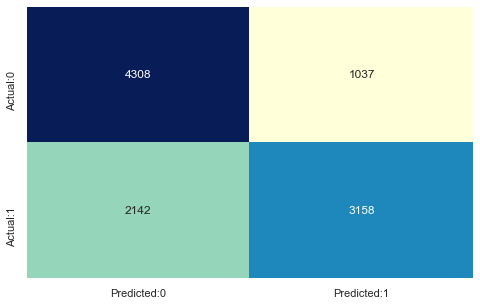

In [145]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_GNB)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [146]:
# Generate classification report
result = classification_report(y_test,y_pred_GNB)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.67      0.81      0.73      5345
           1       0.75      0.60      0.67      5300

    accuracy                           0.70     10645
   macro avg       0.71      0.70      0.70     10645
weighted avg       0.71      0.70      0.70     10645



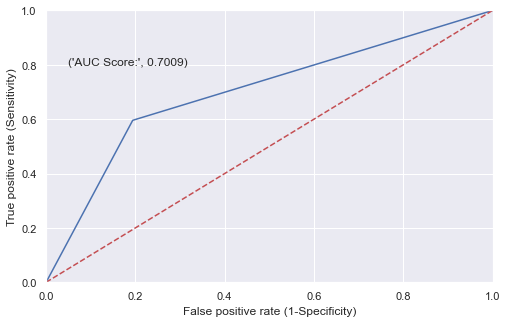

In [147]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_GNB)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_GNB),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [148]:
# create the result table for all scores
GNB_metrices = pd.Series({'Model': "Naive Bayes",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_GNB),
                 'Precision Score': metrics.precision_score(y_test, y_pred_GNB),
                 'Recall Score': metrics.recall_score(y_test, y_pred_GNB),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_GNB),

                  'f1-score':metrics.f1_score(y_test, y_pred_GNB)})



# appending our result table
result_tabulation = result_tabulation.append(GNB_metrices , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.719559,0.720771,0.713019,0.719587,0.716874
1,AdaBoost,0.797354,0.812277,0.771509,0.797464,0.791368
2,Naive Bayes,0.700918,0.752801,0.595849,0.701362,0.665192


<a id="KNN"> </a>
### 4.4 KNN

[...goto toc](#toc)

To find optimal value of **k** we will be performing hyperparameter tuning using **Grid Search Cross Validation** 

In [149]:
# Import KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [150]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Initialize a knn object
knn = KNeighborsClassifier()

# Create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 6)}

In [151]:
# Perform gridsearch
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

# fit the data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5])})

In [152]:
# Get the best estimator
knn_gscv.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [153]:
# predict the values
y_pred_knn  = knn_gscv.predict(X_test)

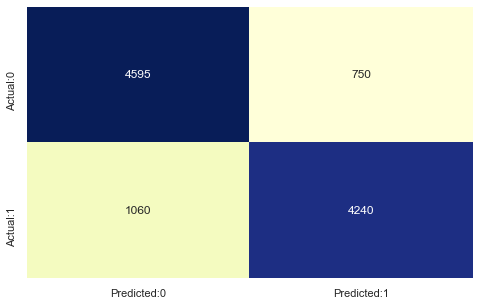

In [154]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [155]:
# Generate classification_report
result = classification_report(y_test, y_pred_knn)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      5345
           1       0.85      0.80      0.82      5300

    accuracy                           0.83     10645
   macro avg       0.83      0.83      0.83     10645
weighted avg       0.83      0.83      0.83     10645



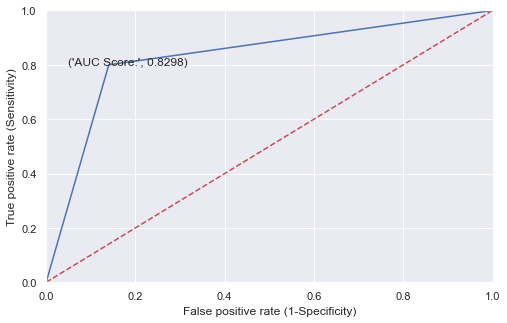

In [156]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_knn),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

In [157]:
# create the result table for all scores
knn_metrics = pd.Series({'Model': "KNN",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_knn),
                 'Precision Score': metrics.precision_score(y_test, y_pred_knn),
                 'Recall Score': metrics.recall_score(y_test, y_pred_knn),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_knn),
                  'f1-score':metrics.f1_score(y_test, y_pred_knn)})



# appending our result table
result_tabulation = result_tabulation.append(knn_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.719559,0.720771,0.713019,0.719587,0.716874
1,AdaBoost,0.797354,0.812277,0.771509,0.797464,0.791368
2,Naive Bayes,0.700918,0.752801,0.595849,0.701362,0.665192
3,KNN,0.829841,0.849699,0.800000,0.829967,0.824101


<a id="model_cmp"> </a>
## 5. Model Comparision

[...goto toc](#toc)

In [158]:
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.719559,0.720771,0.713019,0.719587,0.716874
1,AdaBoost,0.797354,0.812277,0.771509,0.797464,0.791368
2,Naive Bayes,0.700918,0.752801,0.595849,0.701362,0.665192
3,KNN,0.829841,0.849699,0.800000,0.829967,0.824101


<hr style="border:1.2px solid gray"> </hr>
<h3><center>Best Model</center></h3>
<hr style="border:1.2px solid gray"> </hr>

| Model | AUC Score | Precision Score | Recall Score | Accuracy Score | f1-score |
| :-: | :-: | :-: | :-: | :-: | :-: |
| KNN  | 0.829841 | 0.849699 | 0.800000 | 0.829967 | 0.824101 |

<hr>

In [159]:
best_model = knn_gscv

### Save the model

In [160]:
import joblib

In [161]:
joblib.dump(best_model, 'model/model.pkl')

['model/model.pkl']